# Visualizing Frequency Distributions
## Bar Plots

For variables measured on a nominal or an ordinal scale it's common to use a bar plot to visualize their distribution. To generate a bar plot for the distribution of a variable we need two sets of values:
* One set containing the unique values.
* Another set containing the frequency for each unique value.

We can get this data easily from a frequency table. We can use Series.value_counts() to generate the table, and then use the Series.plot.bar() method on the resulting table to generate a bar plot.


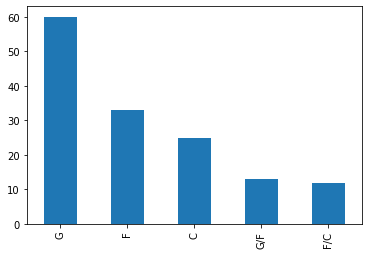

In [45]:
import pandas as pd
wnba = pd.read_csv('wnba.csv')
wnba['Pos'].value_counts().plot.bar()

To generate a horizontal bar plot, we can use the `Series.plot.barh()` method:

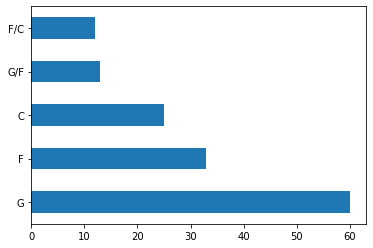

In [46]:
wnba['Pos'].value_counts().plot.barh()

Table Type 
      Experience
0             2
1            12
2             4
3             6
4             0
..          ...
138           6
139           9
140           2
141           8
142           2

[143 rows x 1 columns]
EXP Table 
 15     2
14     3
13     3
12     4
11     4
10     5
9     11
8      3
7      4
6     14
5     14
4     11
3     19
2     11
1     12
0     23
Name: Experience, dtype: int64


Experienced          25
Little experience    42
Rookie               23
Very experienced     37
Veteran              16
Name: Exp_ordinal, dtype: int64


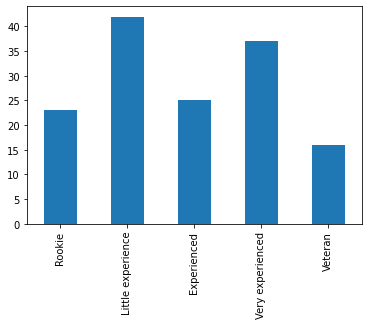

In [47]:

def make_exp_ordinal(row):
    if (0 < row['Experience'] <=3):
        return 'Little experience'
    if (3 < row['Experience'] <= 5):
        return 'Experienced'
    if (5 < row['Experience'] <= 10):
        return 'Very experienced'
    if row['Experience'] > 10:
      return'Veteran'
    else:
        return 'Rookie'

wnba['Exp_ordinal'] = wnba.apply(make_exp_ordinal, axis = 1)
intervals = pd.interval_range(start=0, end=200, freq=1)
freq_table = wnba['Exp_ordinal'].value_counts().sort_index()
exp_table = wnba['Experience'].value_counts().sort_index(ascending = False)
table_type = pd.DataFrame(wnba, columns=['Experience'])

print("Table Type", "\n", table_type)
print("EXP Table", "\n", exp_table)
print('\n')
print(freq_table)
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar()

***
## Horizontal Bar Plot

We can rotate the labels using the rot parameter of Series.plot.bar() method we used. The labels are already rotated at 90°, and we can tilt them a bit at 45°:

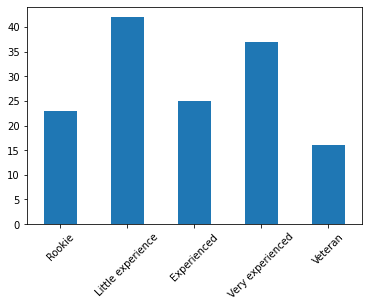

In [48]:
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.bar(rot = 45)

To make a bar plot, we use `Series.plot.barh` method.

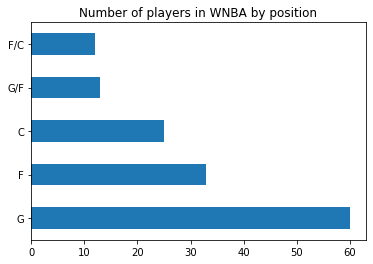

In [49]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

* Generate a frequency table for the Exp_ordinal variable.
* Sort the table by unique labels in an ascending order.
* Use the Series.plot.barh() method to generate the horizontal bar plot.
* Add the following title to the plot: "Number of players in WNBA by level of experience".

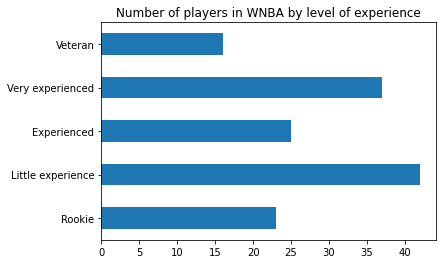

In [50]:
freq_table = wnba['Exp_ordinal'].value_counts().sort_index()
wnba['Exp_ordinal'].value_counts().iloc[[3,0,2,1,4]].plot.barh(
    title = 'Number of players in WNBA by level of experience')

***
## Pie Charts

Another kind of graph we can use to visualize the distribution of nominal and ordinal variables is a pie chart.
We can generate pie charts using the Series.plot.pie() method. This is how we'd do that for the Pos variable:

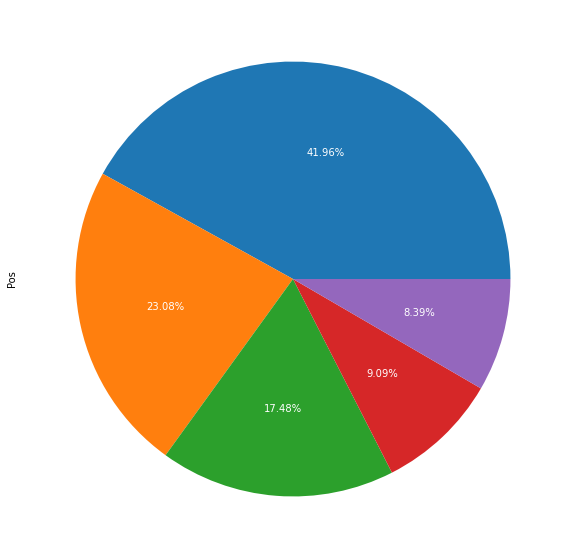

In [51]:
wnba['Pos'].value_counts().plot.pie(figsize=(10,10), autopct = "%.2f%%", textprops=dict(color="w"))


The main advantage of pie charts over bar plots is that they provide a much better sense for the relative frequencies (proportions and percentages) in the distribution. Looking at a bar plot, we can see that categories are more or less numerous than others, but it's really hard to tell what proportion in the distribution each category takes.

Generate a pie chart to visualize the distribution of the Exp_ordinal variable.
* Generate a frequency table for the Exp_ordinal variable. Don't sort the table this time.
* Use the Series.plot.pie() method to generate the pie plot.

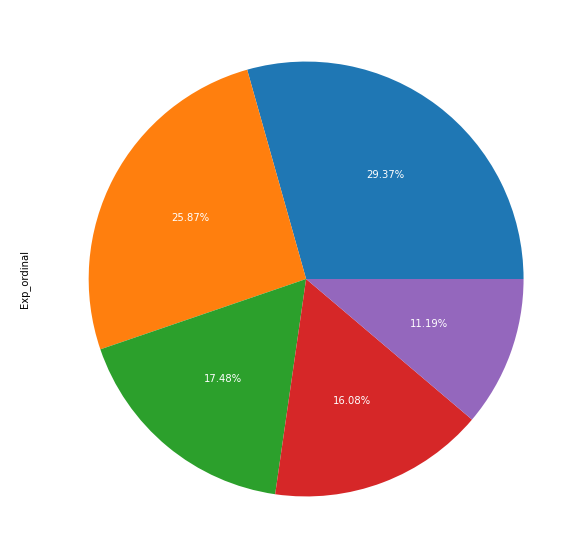

In [52]:
wnba['Exp_ordinal'].value_counts().plot.pie(figsize=(10,10),textprops=dict( color="w"),autopct="%.2f%%",)

***
## Customizing pie charts

I already jumped the gun on this one. The info is in the docs at [MatPlotLib Website](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

Text(0, 0.5, 'Position')

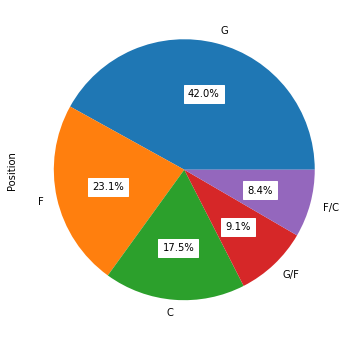

In [53]:
import matplotlib.pyplot as plt
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), textprops=dict(backgroundcolor="white"), autopct = '%.1f%%')
plt.ylabel('Position', backgroundcolor="white")

Generate and customize a pie chart to visualize the distribution of the Exp_ordinal variable.

* Generate a frequency table for the Exp_ordinal variable. Don't sort the table this time.
* Use the Series.plot.pie() method to generate the pie plot.
    * Use the figsize parameter to specify a width and a height of 6 inches each.
    * Use the autopct parameter to have percentages displayed with a precision of 2 decimal places.
    * Add the following title to the plot: "Percentage of players in WNBA by level of experience".
    * Remove the Exp_ordinal label.

Text(0, 0.5, '')

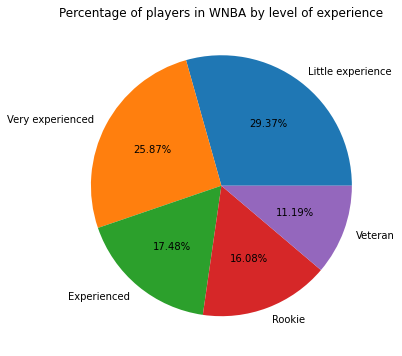

In [54]:
wnba['Exp_ordinal'].value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%',
                                    title = 'Percentage of players in WNBA by level of experience')
plt.ylabel('')

***
## Histograms

In [55]:
print(wnba['PTS'].describe())

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64


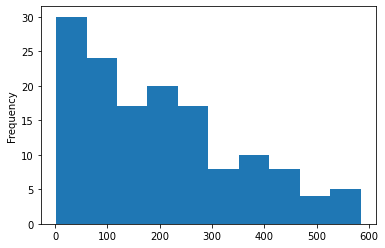

In [56]:
wnba['PTS'].plot.hist()

***
## The Statistics behind Histograms

Under the hood, the `wnba['PTS'].plot.hist()` method:
  * Generated a grouped frequency distribution table for the PTS variable with ten class intervals.
  * For each class interval it plotted a bar with a height corresponding to the frequency of the interval.

Let's examine the grouped frequency distribution table of the PTS variable:

In [57]:
print(wnba['PTS'].value_counts(bins = 10).sort_index())

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


Each bar in the histogram corresponds to one class interval. To show this is true, we'll generate below the same histogram as in the previous screen, but this time:
  * We'll add the values of the x-ticks manually using the xticks parameter.
      * The values will be the limits of each class interval.
      * We use the arange() function from numpy to generate the values and avoid spending time with typing all the values ourselves.
      *  We start at 2, not at 1.417, because this is the actual minimum value of the first class interval (we discussed about this in more detail in the previous lesson).
  * We'll add a grid line using the grid parameter to demarcate clearly each bar.
  * We'll rotate the tick labels of the x-axis using the rot parameter for better readability.

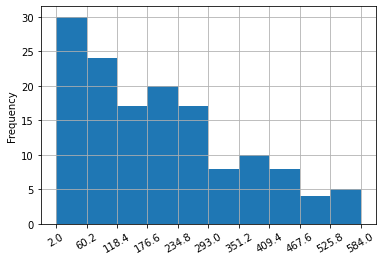

In [58]:
from numpy import arange
wnba['PTS'].plot.hist(grid = True, xticks = arange(2,585,58.2), rot = 30)

![Table Info](https://s3.amazonaws.com/dq-content/286/s1m4_patterns.svg)

* Examine the distribution of the Games Played variable using the Series.describe() method. Just from the output of this method, predict how the histogram of the Games Played variable should look like.

* Once you have a good idea of what histogram shape to expect, plot a histogram for the Games Played variable using Series.plot.hist().

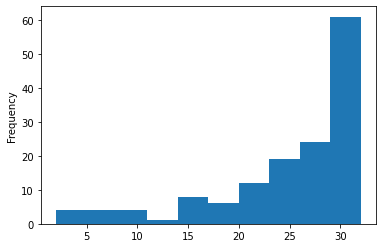

In [59]:
wnba['Games Played'].plot.hist()

***
## Histograms as Modified Bar Plots

![Scale](https://s3.amazonaws.com/dq-content/286/s1m4_table_summary.svg)

***
## Binning for Histograms

![intervals](https://s3.amazonaws.com/dq-content/286/s1m4_hist_bins.svg)

To modify the number of class intervals used for a histogram, we can use the `bins` parameter of `Series.plot.hist()`. A bin is the same thing as a class interval, and, when it comes to histograms, the term "bin" is used much more often.

Also, we'll often want to avoid letting pandas work out the intervals, and use instead intervals that we think make more sense. We can do this in two steps:  
  * We start with specifying the `range` of the entire distribution using the range parameter of `Series.plot.hist()`.
  * Then we combine that with the number of bins to get the intervals we want.

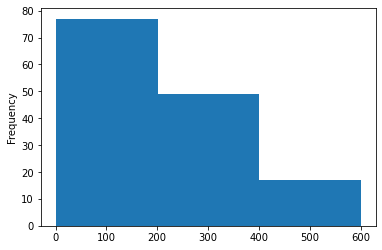

In [60]:
wnba['PTS'].plot.hist(range = (1,600), bins = 3)

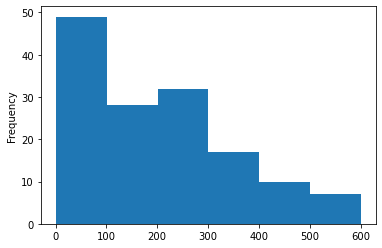

In [61]:
wnba['PTS'].plot.hist(range = (1,600), bins = 6)

Generate a histogram for the Games Played variable, and customize it in the following way:
  * Each bin must cover an interval of 4 games. The first bin must start at 1, the last bin must end at 32.
  * Add the title "The distribution of players by games played".
  * Add a label to the x-axis named "Games played".

Text(0.5, 0, 'Games played')

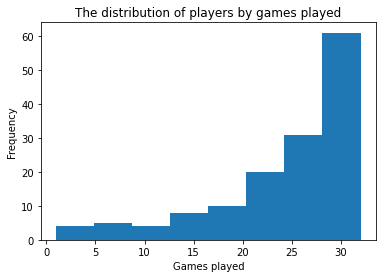

In [62]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8, title = 'The distribution of players by games played')
plt.xlabel('Games played')

***
## Skewed Distributions

In a skewed distribution:
  *  The values pile up toward the end or the starting point of the range, making up the body of the distribution.
  * Then the values decrease in frequency toward the opposite end, forming the tail of the distribution.
  
![Style](https://s3.amazonaws.com/dq-content/286/s1m4_body_tail.svg)

If the tail points to the left, then the distribution is said to be **left skewed**. When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called **negatively skewed**.

If the tail points to the right, then the distribution is **right skewed**. The distribution is sometimes also said to be **positively skewed** because the tail points in the direction of positive numbers.

![Skewed](https://s3.amazonaws.com/dq-content/286/s1m4_skewed_distros_v2.svg)

* Examine the distribution of the following two variables:
    * AST (number of assists).
    * FT% (percentage of free throws made out of all attempts).
* Depending on the shape of the distribution, assign the string 'left skewed' or 'right skewed' to the following variables:
    * assists_distro for the AST column.
    * ft_percent_distro for the FT% column.
    
For instance, if you think the AST variable has a right skewed distribution, your answer should be assists_distro = 'right skewed'.

In [63]:
assists_distro = 'right skewed'
ft_percent_distro = 'left skewed'

***
## Symmetrical Distributions

If the shape of the histogram is symmetrical, then we say that we have a **symmetrical distribution**.

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a **normal distribution** (also called Gaussian distribution).

![Even](https://s3.amazonaws.com/dq-content/286/s1m4_normal.svg)

Another common symmetrical distribution is one where the values are distributed *uniformly* across the entire range. This pattern is specific to a **uniform distribution**.



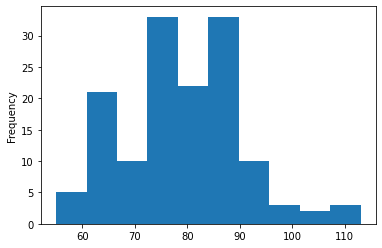

In [64]:
wnba['Weight'].plot.hist()

When we say that the distribution above resembles closely a normal distribution, we mean that most values pile up somewhere close to the middle and decrease in frequency more or less gradually toward both ends of the histogram.

A similar reasoning applies to skewed distributions. We don't see very often clear-cut skewed distributions, and we use the left and right skewed distributions as baselines for comparison. For instance, we'd say that the distribution of the BMI variable is slightly right skewed:

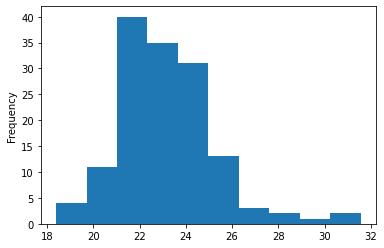

In [65]:
wnba['BMI'].plot.hist()

* Examine the distribution of the following variables, trying to determine which one resembles the most a normal distribution:
    * Age
    * Height
    * MIN
* Assign to the variable normal_distribution the name of the variable (as a string) whose distribution resembles the most a normal one.

For instance, if you think the MIN variable is the correct answer, then your answer should be normal_distribution = 'MIN'.

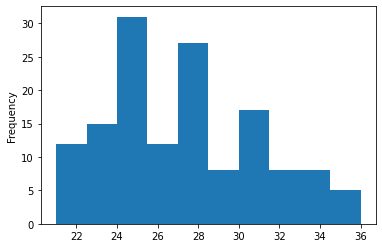

In [66]:
wnba['Age'].plot.hist()

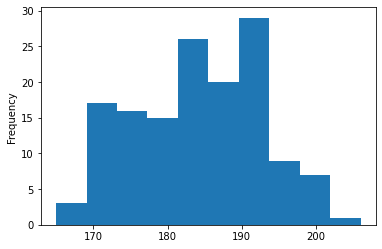

In [67]:
wnba['Height'].plot.hist()

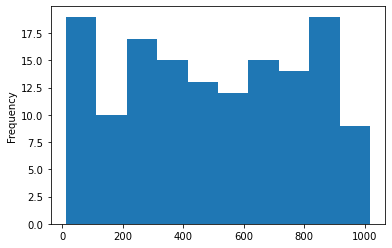

In [68]:
wnba['MIN'].plot.hist()

In [69]:
normal_distribution = 'Height'